# Деревья решения

Дерево решений - простой метод машинного обучения с учителем для задач классификации и регрессии.

Как выглядит простое дерево решений:

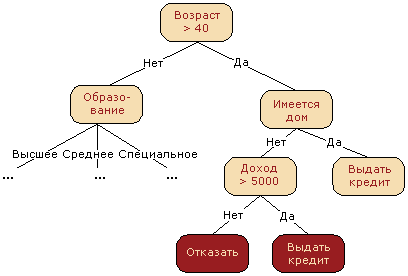


В листьях содержиться значение целевой переменной (дали кредит/не дали, выжил/не выжил, котик/сабачка/птичка и так далее)

В узлах дерева содержиться признаки

На ребре содержиться значение признака

Корневой узел выбирается так, чтобы было наилучшее разбиение. Наилучшим разбиением считается такое, которое максимально уменьшает значение энтропии.



Параметры дерева.

- criterion: какой критерий для разбиения использовать (коэффицент джини или энтропию)

- max_depth: максимальная глубина дерева — точка, на которой останавливается разбиение узлов. Это похоже на выбор максимального количества слоев в глубокой нейронной сети. Меньшее количество сделает модель быстрой, но не точной. Большее количество увеличивает точность, но создает риски переобучения и замедляет процесс.

- min_samples_split: необходимое минимальное количество выборок для разбиения узлов. Мы уже обсуждали это выше вместе с тем, как настроить высокое значение, чтобы минимизировать переобучение.

- max_features: число признаков для поиска лучшей точки для разбиения. Чем больше число, тем лучше результат. Но в этом случае обучение займет больше времени.

- min_impurity_split: порог для ранней остановки роста дерева. Узел разобьется только в том случае, если его точность будет выше указанного порога. Такой метод может служить в качестве компромисса между минимизацией переобучения (высокое значение, маленькое дерево) и высокой точностью (низкое значение, большое дерево).

- presort: выбор того, нужно ли предварительно сортировать данные для ускорения поиска наилучшего разбиения при подборе. Если данные заранее отсортируются по каждому признаку, то алгоритму обучения будет гораздо проще найти хорошие значения для разбиения.-

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
import pandas as pd

df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#выделим вектор ответов и вектор признаков
X = df.drop(['Outcome'], axis = 1)
y = df['Outcome']

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# DecisionTreeRegression
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=1/3, random_state=42)

tree = DecisionTreeClassifier(max_depth=4, random_state=1)
# model = LogistiResression()
# knn = KNearestNeighbor()

tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# новый столбец с ответами
test['name'] = y_pred_tree

test.to_csv('name.csv',index=False)
files.download("name.csv")

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print("Accuracy:", accuracy_score(y_test,y_pred_tree))
print("Recall:", recall_score(y_test,y_pred_tree))
print("Precision:", precision_score(y_test,y_pred_tree))

Accuracy: 0.72265625
Recall: 0.7209302325581395
Precision: 0.5688073394495413


# Улучшение работы моделей

Кроссвалидация

Главная задача обучаемых алгоритмов – их способность обобщаться, то есть хорошо работать на новых данных. Поскольку на новых данных мы сразу не можем проверить качество построенной модели (нам ведь надо для них сделать прогноз, то есть истинных значений целевого признака мы для них не знаем), то надо пожертвовать небольшой порцией данных, чтоб на ней проверить качество модели.

Чаще всего это делается одним из 2 способов:
- отложенная выборка (held-out/hold-out set). При таком подходе мы оставляем какую-то долю обучающей выборки (как правило от 20% до 40%), обучаем модель на остальных данных (60-80% исходной выборки) и считаем некоторую метрику качества модели (например, самое простое – долю правильных ответов в задаче классификации) на отложенной выборке.
В основном с помощью метода train_test_split делим данные на две части
- кросс-валидация (cross-validation, на русский еще переводят как скользящий или перекрестный контроль). Тут самый частый случай – K-fold кросс-валидация

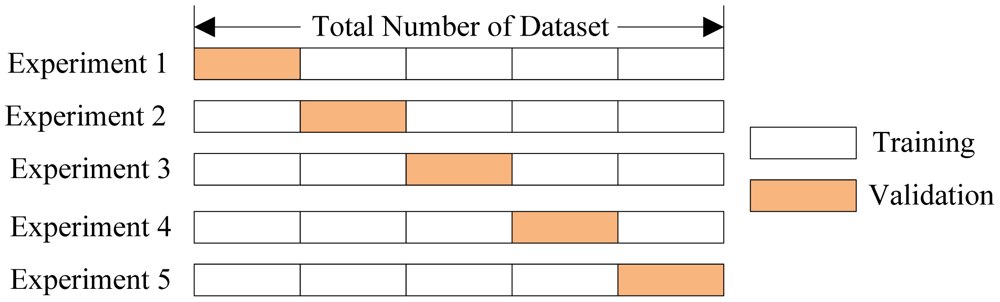

Тут модель обучается  раз на разных () подвыборках исходной выборки (белый цвет), а проверяется на одной подвыборке (каждый раз на разной, оранжевый цвет).
Получаются  оценок качества модели, которые обычно усредняются, выдавая среднюю оценку качества классификации/регрессии на кросс-валидации.


Кросс-валидация дает лучшую по сравнению с отложенной выборкой оценку качества модели на новых данных. Но кросс-валидация вычислительно дорогостоящая, если данных много.



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# KFold divides all the samples in  groups of samples, called folds
# (if , this is equivalent to the Leave One Out strategy), of equal sizes (if possible)

# The simplest way to use cross-validation is to call the cross_val_score helper function on the estimator and the dataset.
# cross_val_score - возвращает массив оценок для каждого варианта разиения, 
# оценка модели в данном случае - это среднее

# n-splits - количество фолдов на которые хотим разделить
# shuffle - перемещать данные перед разбиение или нет
kf = KFold(n_splits=5)

# создаем модель 
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
# log = LogisticRegression()
# создаем кросс валидацию
# estimator - модель для которой применить кросс валидацию (логистическая регрессия, knn, дерево решений и т.д.)
# X - вектор признаков
# y - вектор ответов
# cv - параметры разбиения на фолды
# scoring - оценка по который оценить модель
cvs = cross_val_score(estimator=tree, X=X, y=y, cv=kf, scoring='accuracy')

print(cvs)
print(cvs.mean())

[0.73376623 0.65584416 0.78571429 0.82352941 0.7254902 ]
0.7448688566335624


Полезные ссылки:

- про k-fold:

https://towardsdatascience.com/complete-guide-to-pythons-cross-validation-with-examples-a9676b5cac12

- про модели классификации (тут и дерево решений, и метод соседей и логистическа). ***Рекомендую прочитать!***

https://nagornyy.me/courses/data-science/classification/

- про кросс валидацию

https://scikit-learn.org/stable/modules/cross_validation.html
